# Importação e aquisição de dados

In [1]:
# utilizado quando da criação do notebook, para recarregar os arquivos externos automaticamente

%load_ext autoreload
%autoreload 2

In [2]:
import input_data as inpdt  # arquivo de funções criadas para tratar os dados
import plots  # arquivo de funções criadas para plotar os dados
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "dados_brutos/inscricoes2019_anonimo.csv"

A célula abaixo utiliza funções criadas em `input_data.py` para gerar um dataframe com index de datas no formato do Pandas e sem nomes de estudantes duplicados.

O arquivo `input_data.py` possui diversas funções que foram feitas para agilizar a análise dos dados. As funções são baseadas nas próprias funções do pandas. Vale consultar o arquivo e a documentação do mesmo.

In [4]:
df = inpdt.input_data(file_path)  # gera dataframe

column = 'Carimbo de data/hora'
df = inpdt.time_index(df, column)  # coluna de index com as datas

# remove eventuais duplicatas de alunos que preencheram duas vezes
column = 'Nome completo'
df = inpdt.no_duplicates(df, column)

df.head()

,Nome completo,Curso,Turma (Ex: TM222; BM151; PMQ361 - escrever dessa forma),Categoria
Carimbo de data/hora,,,,
2019-03-31 23:50:17,9LLubhn8,Biotecnologia (integrado),TM213,Nível 1 (Integrado - 2º ou 3º período)
2019-03-31 23:54:19,GjNrK8vE,Alimentos (integrado),AM241,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 00:51:53,eh7gy8RG,Química (integrado),QM151,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 00:56:24,cFmKhcXX,Meio-ambiente (integrado),MAM261,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-01 01:12:32,Tzm3qX1j,Biotecnologia (integrado),BM 161,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...


In [5]:
df.sort_index().head()  # ordena por data caso o arquivo bruto não esteja ordenado

,Nome completo,Curso,Turma (Ex: TM222; BM151; PMQ361 - escrever dessa forma),Categoria
Carimbo de data/hora,,,,
2019-03-31 23:50:17,9LLubhn8,Biotecnologia (integrado),TM213,Nível 1 (Integrado - 2º ou 3º período)
2019-03-31 23:54:19,GjNrK8vE,Alimentos (integrado),AM241,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 00:51:53,eh7gy8RG,Química (integrado),QM151,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 00:56:24,cFmKhcXX,Meio-ambiente (integrado),MAM261,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-01 01:12:32,Tzm3qX1j,Biotecnologia (integrado),BM 161,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...


# Visão geral

## Tabela: inscrições por dia

In [6]:
# gera inscrições por dia com base na coluna de nomes
count_df = inpdt.count_date(df, "Nome completo")
count_df.head()

,Contagem
Carimbo de data/hora,
2019-03-31,2
2019-04-01,5
2019-04-02,4
2019-04-03,0
2019-04-04,14


In [7]:
count_df.sum()  # total de inscrições

Contagem    173
dtype: int64

### Tabelas: inscrições após deadlines

As incrições foram prorrogadas 3 vezes, de forma que tivemos 4 deadlines.

In [8]:
deadline1 = '2019-05-04'
deadline2 = '2019-05-11'
deadline3 = '2019-05-27'
deadline4 = '2019-05-30'

# inscrições nas prorrogações
inpdt.count_date(df, "Nome completo", from_date=deadline1).head()

,Contagem
Carimbo de data/hora,
2019-05-05,3
2019-05-06,1
2019-05-07,2
2019-05-08,3
2019-05-09,3


In [9]:
inpdt.count_date(df, "Nome completo", from_date=deadline1).sum()

Contagem    44
dtype: int64

Nas células a seguir, inscrições por cada período de prorrogação

In [10]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline1,
                          to_date=deadline2).head()

,Contagem
Carimbo de data/hora,
2019-05-05,3
2019-05-06,1
2019-05-07,2
2019-05-08,3
2019-05-09,3


In [11]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline1,
                          to_date=deadline2).sum()

Contagem    19
dtype: int64

In [12]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline2,
                          to_date=deadline3).head()

,Contagem
Carimbo de data/hora,
2019-05-12,1
2019-05-13,0
2019-05-14,0
2019-05-15,0
2019-05-16,1


In [13]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline2,
                          to_date=deadline3).sum()

Contagem    20
dtype: int64

In [14]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline3,
                          to_date=deadline4).head()

,Contagem
Carimbo de data/hora,
2019-05-28,0
2019-05-29,0
2019-05-30,5


In [15]:
inpdt.count_date_interval(df,
                          "Nome completo",
                          from_date=deadline3,
                          to_date=deadline4).sum()

Contagem    5
dtype: int64

## Gráfico: inscrições por dia

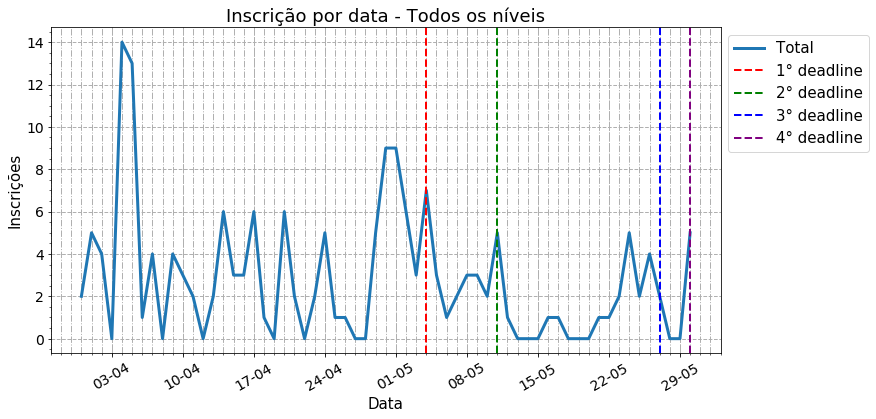

In [16]:
fig1, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

dates = count_df.index
count = [count_df['Contagem']]
names = ['Total']
labels = ['Data', 'Inscrições', 'Inscrição por data - Todos os níveis']
deadlines = ['2019-05-04', '2019-05-11', '2019-05-27', '2019-05-30']

plots.plot_date(dates, count, labels, deadlines, names, ax=axarr)

figname = 'images/insc_data_total'
fig1.savefig(figname, bbox_inches='tight', dpi=300)

 Até o dia 05/04 foram os dias em que passamos nas turmas para divulgar o evento. Bem mais tempo de inscrições abertas comparando com o ano passado.

## Tabela: Inscrições por curso e período

In [17]:
cursos_periodo_df = inpdt.pivot_tables(df, 'Nome completo', 'Curso', 'Categoria')
cursos_periodo_df

Categoria,Nível 1 (Integrado - 2º ou 3º período),Nível 2 (Integrado - 4º ou 5º período ; Pós-médio - 1º ao 3º período),Nível 3 (Integrado - 6º ao 8º período ; Pós-médio - 4º ao 6º período),Total
Curso,,,,
Alimentos (integrado),3.0,15.0,2.0,20
Biotecnologia (integrado),18.0,11.0,7.0,36
Farmácia (integrado),12.0,11.0,5.0,28
Meio-ambiente (integrado),11.0,7.0,6.0,24
Química (integrado),14.0,21.0,29.0,64
Química (subsequente),0.0,0.0,1.0,1
Total,58.0,65.0,50.0,173


In [18]:
# o relatório foi feito em LaTeX, então aproveito para exportar nesse formato

inpdt.latex(cursos_periodo_df)

\begin{tabular}{lrrrr}
\toprule
Categoria &  Nível 1 (Integrado - 2º ou 3º período) &  Nível 2 (Integrado - 4º ou 5º período ; Pós-médio - 1º ao 3º período) &  Nível 3 (Integrado - 6º ao 8º período ; Pós-médio - 4º ao 6º período) &  Total \\
Curso                     &                                         &                                                                        &                                                                        &        \\
\midrule
Alimentos (integrado)     &                                     3.0 &                                               15.0 &                                                2.0 &     20 \\
Biotecnologia (integrado) &                                    18.0 &                                               11.0 &                                                7.0 &     36 \\
Farmácia (integrado)      &                                    12.0 &                                               11.0 &                             

## Gráfico: Inscrições por curso

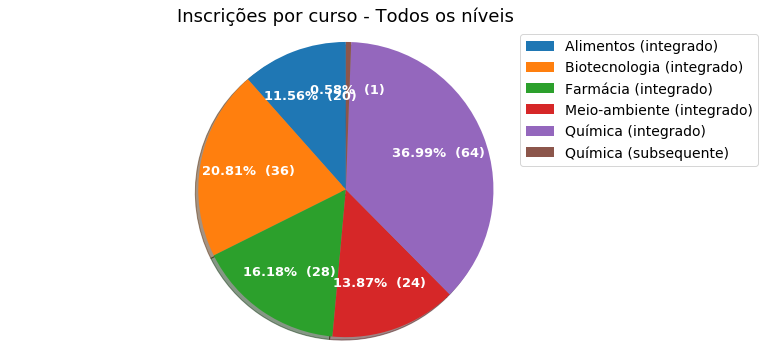

In [19]:
fig2, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(cursos_periodo_df, 3)
labels = inpdt.pivot_index(cursos_periodo_df)

plots.plot_pizza(values,
                 labels,
                 'Inscrições por curso - Todos os níveis',
                 ax=axarr)

figname = 'images/insc_curso'
fig2.savefig(figname, bbox_inches='tight', dpi=300)

## Gráfico: inscrições por categoria

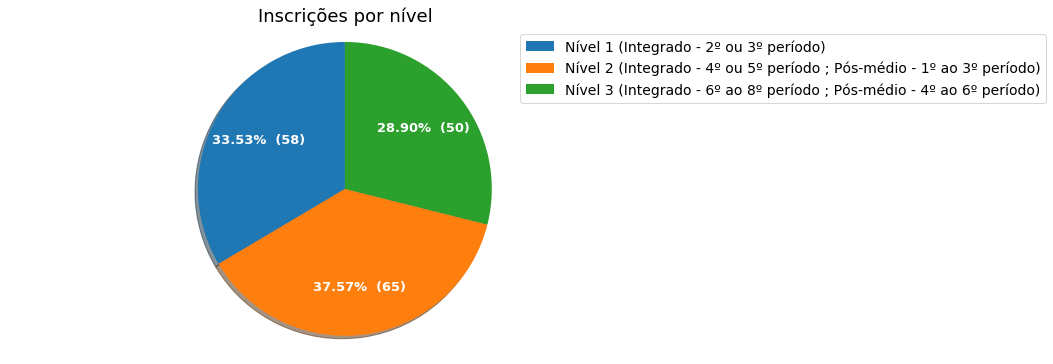

In [20]:
fig3, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_total(cursos_periodo_df)[0]
labels = inpdt.pivot_total(cursos_periodo_df)[1]

plots.plot_pizza(values, labels, 'Inscrições por nível', ax=axarr)

figname = 'images/insc_nivel'
fig3.savefig(figname, bbox_inches='tight', dpi=300)

# Nível 1

In [22]:
nivel1_df = df[df['Categoria'] == 'Nível 1 (Integrado - 2º ou 3º período)']
nivel1_df.head()

,Nome completo,Curso,Turma (Ex: TM222; BM151; PMQ361 - escrever dessa forma),Categoria
Carimbo de data/hora,,,,
2019-03-31 23:50:17,9LLubhn8,Biotecnologia (integrado),TM213,Nível 1 (Integrado - 2º ou 3º período)
2019-04-02 23:48:06,BbHXEmJi,Biotecnologia (integrado),BM131,Nível 1 (Integrado - 2º ou 3º período)
2019-04-04 15:56:56,AokZEoL6,Biotecnologia (integrado),BM131,Nível 1 (Integrado - 2º ou 3º período)
2019-04-04 22:37:35,cH9idNgn,Biotecnologia (integrado),BM131,Nível 1 (Integrado - 2º ou 3º período)
2019-04-04 22:47:47,QFdNC7O0,Química (integrado),QM131,Nível 1 (Integrado - 2º ou 3º período)


In [23]:
nivel1_count_df = inpdt.count_date(nivel1_df, "Nome completo")
nivel1_count_df.head()

,Contagem
Carimbo de data/hora,
2019-03-31,1
2019-04-01,0
2019-04-02,1
2019-04-03,0
2019-04-04,5


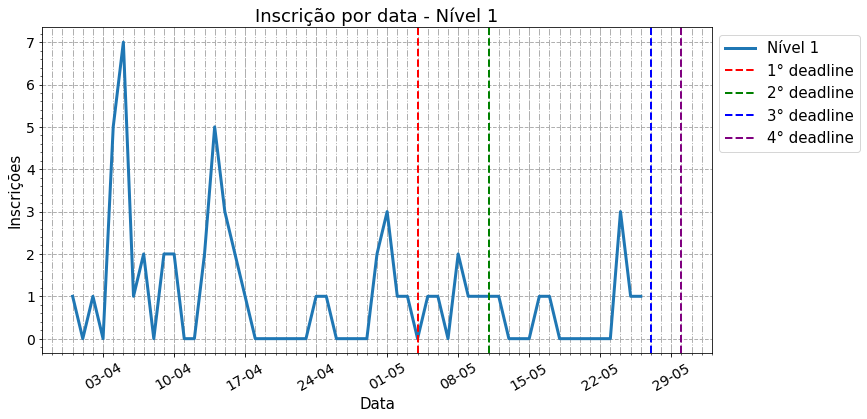

In [24]:
fig4, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

dates = nivel1_count_df.index
count = [nivel1_count_df['Contagem']]
names = ['Nível 1']
labels = ['Data', 'Inscrições', 'Inscrição por data - Nível 1']
deadlines = ['2019-05-04', '2019-05-11', '2019-05-27', '2019-05-30']

plots.plot_date(dates, count, labels, deadlines, names, ax=axarr)

figname = 'images/insc_data_nivel1'
fig4.savefig(figname, bbox_inches='tight', dpi=300)

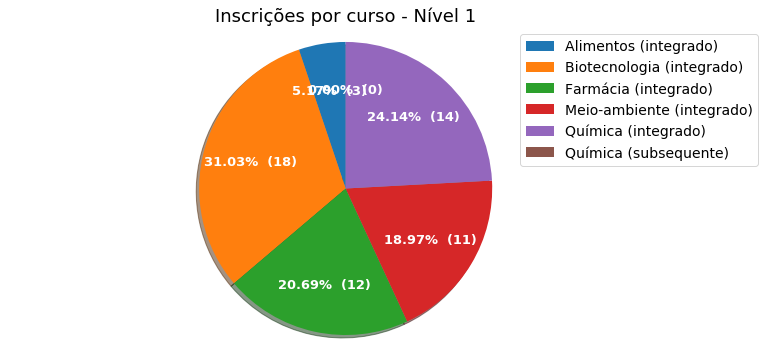

In [25]:
fig5, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(cursos_periodo_df, 0)
labels = inpdt.pivot_index(cursos_periodo_df)

plots.plot_pizza(values, labels, 'Inscrições por curso - Nível 1', ax=axarr)

figname = 'images/insc_curso_nivel1'
fig5.savefig(figname, bbox_inches='tight', dpi=300)

Tentar resolver sobreposição de valores. Resolve tirando valor nulo do gráfico.

# Nível 2

In [26]:
nivel2_df = df[df['Categoria'] == 'Nível 2 (Integrado - 4º ou 5º período ; Pós-médio - 1º ao 3º período)']
nivel2_df.head()

,Nome completo,Curso,Turma (Ex: TM222; BM151; PMQ361 - escrever dessa forma),Categoria
Carimbo de data/hora,,,,
2019-03-31 23:54:19,GjNrK8vE,Alimentos (integrado),AM241,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 00:51:53,eh7gy8RG,Química (integrado),QM151,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 09:05:09,gRhXA1jF,Química (integrado),Qm141,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-01 23:54:50,DuhryjVN,Química (integrado),QM141,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...
2019-04-02 02:07:33,GJgITPlb,Química (integrado),QM141,Nível 2 (Integrado - 4º ou 5º período ; Pós-mé...


In [27]:
nivel2_count_df = inpdt.count_date(nivel2_df, "Nome completo")
nivel2_count_df.head()

,Contagem
Carimbo de data/hora,
2019-03-31,1
2019-04-01,3
2019-04-02,2
2019-04-03,0
2019-04-04,6


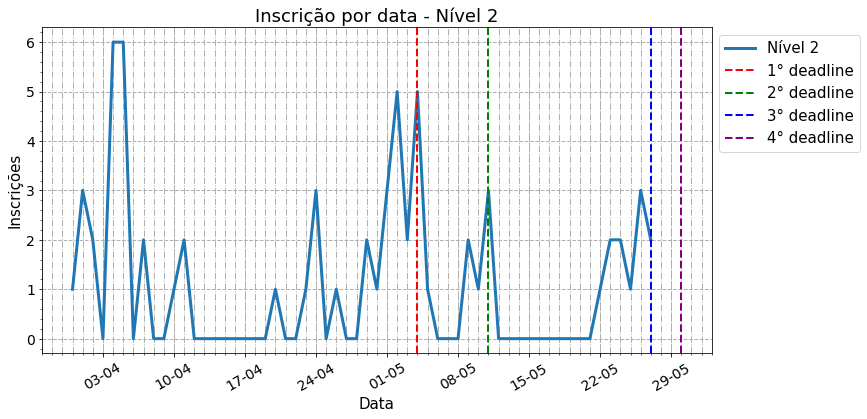

In [28]:
fig6, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

dates = nivel2_count_df.index
count = [nivel2_count_df['Contagem']]
names = ['Nível 2']
labels = ['Data', 'Inscrições', 'Inscrição por data - Nível 2']
deadlines = ['2019-05-04', '2019-05-11', '2019-05-27', '2019-05-30']

plots.plot_date(dates, count, labels, deadlines, names, ax=axarr)

figname = 'images/insc_data_nivel2'
fig6.savefig(figname, bbox_inches='tight', dpi=300)

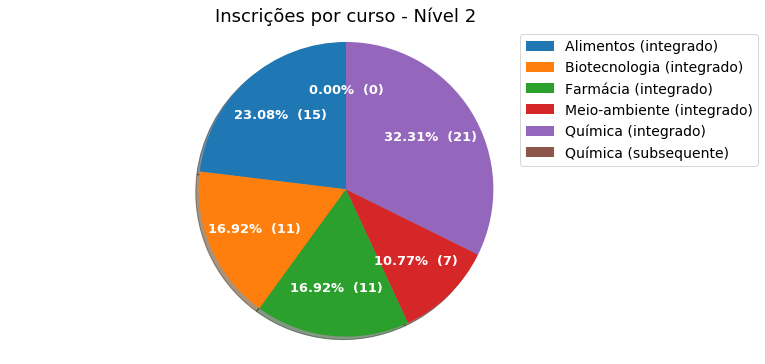

In [29]:
fig7, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(cursos_periodo_df, 1)
labels = inpdt.pivot_index(cursos_periodo_df)

plots.plot_pizza(values, labels, 'Inscrições por curso - Nível 2', ax=axarr)

figname = 'images/insc_curso_nivel2'
fig7.savefig(figname, bbox_inches='tight', dpi=300)

Tentar resolver sobreposição de valores. Resolve tirando valor nulo do gráfico.

# Nível 3

In [30]:
nivel3_df = df[df['Categoria'] == 'Nível 3 (Integrado - 6º ao 8º período ; Pós-médio - 4º ao 6º período)']
nivel3_df.head()

,Nome completo,Curso,Turma (Ex: TM222; BM151; PMQ361 - escrever dessa forma),Categoria
Carimbo de data/hora,,,,
2019-04-01 00:56:24,cFmKhcXX,Meio-ambiente (integrado),MAM261,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-01 01:12:32,Tzm3qX1j,Biotecnologia (integrado),BM 161,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-02 23:59:10,b5rGvCSy,Meio-ambiente (integrado),MAM 261,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-04 22:34:30,WMtIsCIj,Química (integrado),QM161,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...
2019-04-04 23:19:06,gVafAXsT,Alimentos (integrado),AM261,Nível 3 (Integrado - 6º ao 8º período ; Pós-mé...


In [31]:
nivel3_count_df = inpdt.count_date(nivel3_df, "Nome completo")
nivel3_count_df.head()

,Contagem
Carimbo de data/hora,
2019-04-01,2
2019-04-02,1
2019-04-03,0
2019-04-04,3
2019-04-05,0


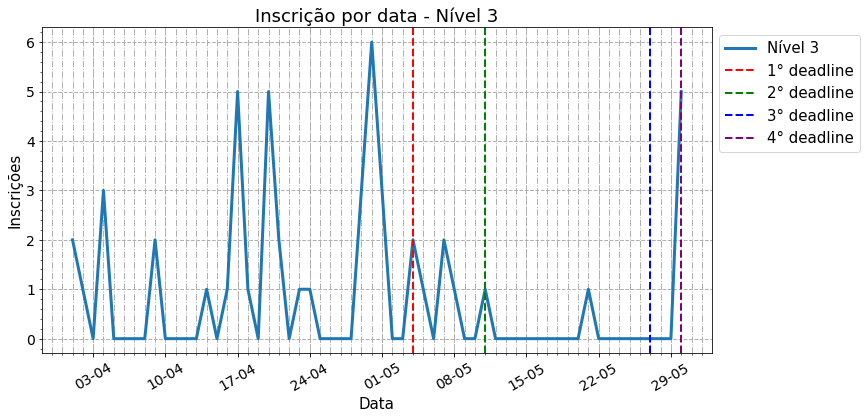

In [32]:
fig8, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

dates = nivel3_count_df.index
count = [nivel3_count_df['Contagem']]
names = ['Nível 3']
labels = ['Data', 'Inscrições', 'Inscrição por data - Nível 3']
deadlines = ['2019-05-04', '2019-05-11', '2019-05-27', '2019-05-30']

plots.plot_date(dates, count, labels, deadlines, names, ax=axarr)

figname = 'images/insc_data_nivel3'
fig8.savefig(figname, bbox_inches='tight', dpi=300)

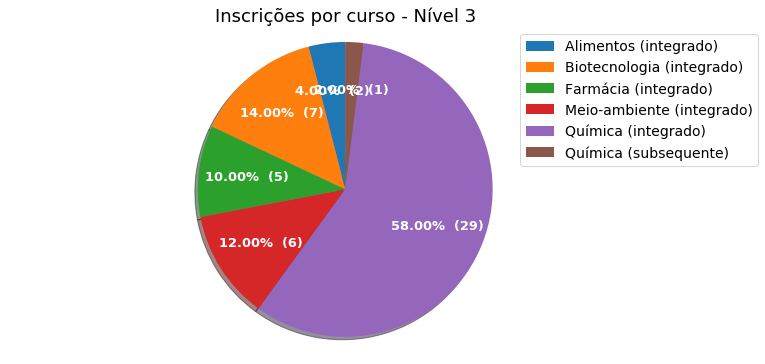

In [33]:
fig9, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(cursos_periodo_df, 2)
labels = inpdt.pivot_index(cursos_periodo_df)

plots.plot_pizza(values, labels, 'Inscrições por curso - Nível 3', ax=axarr)

figname = 'images/insc_curso_nivel3'
fig9.savefig(figname, bbox_inches='tight', dpi=300)

Sobreposição de valores...

# Gráfico: inscrições por nível

In [34]:
# Assegurando que todos os níveis têm o mesmo range de datas
# Isso porque nem todos tiveram inscrições na data inicial e na data final
# Resultando em shapes distintos dos dados, levando a erro da função de plot
idx = pd.date_range('2019-03-31', '2019-05-30')
nivel1_count_df = nivel1_count_df.reindex(idx, fill_value=0)
nivel2_count_df = nivel2_count_df.reindex(idx, fill_value=0)
nivel3_count_df = nivel3_count_df.reindex(idx, fill_value=0)

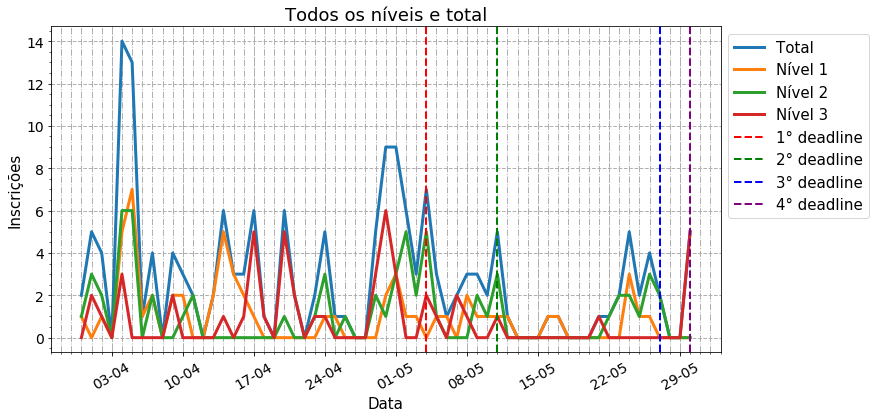

In [35]:
fig10, axarr = plt.subplots(nrows=1,
                            ncols=1,
                            figsize=(12, 6),
                            facecolor=(1.0, 1.0, 1.0))

labels = ['Data', 'Inscrições', 'Todos os níveis e total']
deadlines = ['2019-05-04', '2019-05-11', '2019-05-27', '2019-05-30']
dates = count_df.index

count = [
    count_df['Contagem'], nivel1_count_df['Contagem'],
    nivel2_count_df['Contagem'], nivel3_count_df['Contagem']
]

names = ['Total', 'Nível 1', 'Nível 2', 'Nível 3']

plots.plot_date(dates, count, labels, deadlines, names, ax=axarr)

figname = 'images/insc_data_total_niveis'
fig10.savefig(figname, bbox_inches='tight', dpi=300)

# Informações sobre as versões de packages utilizados

In [36]:
%load_ext version_information
%version_information pandas, matplotlib

Software versions
Python 3.7.3 64bit [GCC 7.3.0]
IPython 7.4.0
OS Linux 4.15.0 20 generic x86_64 with debian buster sid
pandas 0.24.2
matplotlib 3.0.3
Wed Oct 30 09:07:21 2019 -03